In [81]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely.geometry import *
import shapely.ops as so 
# import descartes
import random as rd
import math

### General Attributes and Methods
area, bounds, length, minimum_clearance, geom_type, distance, hausdorff_distance, representative_point

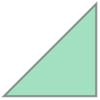

In [2]:
Polygon([[0,0], [1,0], [1,1], [0,0]])

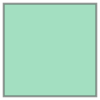

In [3]:
Polygon([[0,0], [1,0], [1,1], [0,1], [0,0]])

In [4]:
a = Polygon([[0,0], [1,0], [1,1], [0,2], [0,0]])
print(a.area)
print(a.bounds) # returns a (minx, miny, maxx, maxy) tuple (float values)
print(a.length) # returns the length (float) of the object
print(a.minimum_clearance) # returns the smallest distance by which a node could be moved to produce an invalid geometry

1.5
(0.0, 0.0, 1.0, 2.0)
5.414213562373095
1.0


In [5]:
pt1 = Point(0,0)
pt2 = Point(1,1)
print(pt1.geom_type)
print(a.geom_type)

Point
Polygon


In [6]:
print(pt1.distance(pt2)) # returns the minimum distance (float) to the other geometric object
# = Point(0,0).distance(Point(1,1))
print(pt1.distance(a))

1.4142135623730951
0.0


In [7]:
line = LineString([(2,0), (2,4), (3,4)])
print(pt1.hausdorff_distance(line))
print(pt1.distance(Point(3,4)))

5.0
5.0


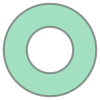

In [8]:
donut = Point(0,0).buffer(2.0).difference(Point(0,0).buffer(1.0))
donut

In [9]:
print(donut.centroid.wkt)
print(donut.representative_point().wkt)

POINT (-3.93292545034967e-18 1.389121559455536e-16)
POINT (1.497592363336098 0.04900857016477875)


### Points
about class Point(coordinates)

In [10]:
pt = Point(0, 0)
q = Point((0,0))
print(pt.area)
print(pt.length)
print(pt.bounds)

0.0
0.0
(0.0, 0.0, 0.0, 0.0)


In [11]:
pt2 = Point(3, 4)
print(list(pt2.coords))
print(pt2.x, pt2.y)
print(pt2.coords[:])
print(Point(pt2))

[(3.0, 4.0)]
3.0 4.0
[(3.0, 4.0)]
POINT (3 4)


### LineStrings
about class LineString(coordinates)

In [12]:
line = LineString([(0,0), (1,1)])
print(line.area)
print(line.length)
print(line.bounds)
print(list(line.coords))
print(len(line.coords))

0.0
1.4142135623730951
(0.0, 0.0, 1.0, 1.0)
[(0.0, 0.0), (1.0, 1.0)]
2


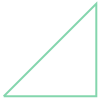

In [13]:
# LinearRing is closed line
ring = LinearRing([(0,0), (1,1), (1,0)])
ring

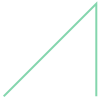

In [14]:
# LineString is opened line
line = LineString([(0,0), (1,1), (1,0)])
line

### Polygons
about class Polygon

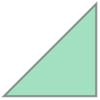

In [15]:
polygon = Polygon([(0,0), (1,1), (1,0)])
polygon

In [16]:
print(polygon.area)
print(polygon.length)
print(polygon.bounds)
print(list(polygon.exterior.coords))
print(list(polygon.interiors))

0.5
3.414213562373095
(0.0, 0.0, 1.0, 1.0)
[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]
[]


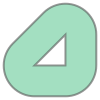

In [17]:
coords = [(0,0), (1,1), (1,0)]
r = LinearRing(coords)
s = Polygon(r)
t = Polygon(s.buffer(1).exterior, [r])
t

In [18]:
print(t.area)

6.5507620529190325


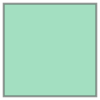

In [19]:
b = box(0, 0, 1, 1)
b

In [20]:
list(b.exterior.coords)

[(1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0)]

### Collections

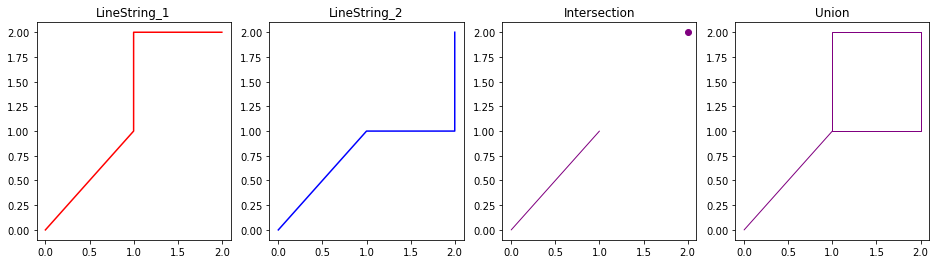

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
a = LineString([(0,0), (1,1), (1,2), (2,2)])
b = LineString([(0,0), (1,1), (2,1), (2,2)])
x = a.intersection(b)
y = a.union(b)
ax[0].plot(*a.xy, color='red')
ax[1].plot(*b.xy, color='blue')

for ob in x:
    x1, y1 = ob.xy
    if len(x1) == 1: # Point
        ax[2].plot(x1, y1, 'o', color='purple', zorder=2)
    else: # Line
        ax[2].plot(x1, y1, color='purple', alpha=1, linewidth=1, solid_capstyle='round', zorder=2)

for od in y:
    x2, y2 = od.xy
    if len(x2) == 1:
        ax[3].plot(x2, y2, 'o', color='purple', zorder=2)
    else:
        ax[3].plot(x2, y2, color='purple', alpha=1, linewidth=1, solid_capstyle='round', zorder=2)

ax[0].set_title('LineString_1')
ax[1].set_title('LineString_2')
ax[2].set_title('Intersection')
ax[3].set_title('Union')
plt.show()

In [22]:
from pprint import pprint

In [23]:
pprint(list(x))
pprint(list(x.geoms))

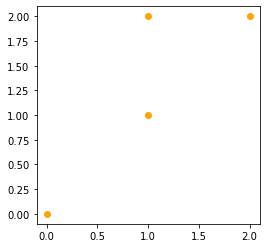

In [24]:
fig = plt.figure(figsize=(4, 4))
mpt = MultiPoint([(0,0), (1,1), (1,2), (2,2)])
for pt in mpt:
    x, y = pt.xy
    plt.scatter(x, y, color='orange', zorder=1)
plt.show()

#### WKT
WKT는 Well Known Text의 약자로, 쉽게 이해할 수 있는 문자열로 데이터를 표현하는 방식으로 GIS의 공간 데이터의 Row 단위를 나타낼 수 있습니다. ... 이러한 WKT 문자열을 통해 VectorLayer에 Feature를 추가할 수 있는데요.

In [25]:
print(mpt[:1].wkt)
print(mpt[:3].wkt)
print(mpt[4:].wkt)

MULTIPOINT (0 0)
MULTIPOINT (0 0, 1 1, 1 2)
GEOMETRYCOLLECTION EMPTY


### Collections of Points
about class MultiPoint(points)

In [26]:
points = MultiPoint([(0,0), (1,1)])
print(type(points))
print(points.geom_type)

<class 'shapely.geometry.multipoint.MultiPoint'>
MultiPoint


In [27]:
print(points.area)
print(points.length)
print(points.bounds)
pprint(list(points))
pprint(list(points.geoms))

0.0
0.0
(0.0, 0.0, 1.0, 1.0)


### Collections of Lines
about class MultiLineString

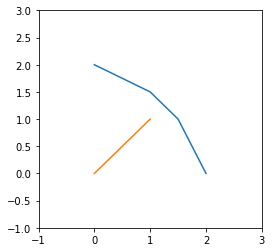

In [28]:
fig = plt.figure(figsize=(4,4))
coords = [((2,0), (1.5,1), (1,1.5), (0,2)), ((0,0), (1,1))]
lines = MultiLineString(coords)
for line in lines:
    x, y = line.xy
    plt.plot(x, y)
plt.xlim([-1, 3])
plt.ylim([-1, 3])
plt.show()

In [29]:
print(lines.area)
print(lines[0].length, lines[1].length, lines.length)
print(len(lines.geoms))

0.0
2.9431747586863373 1.4142135623730951 4.357388321059433
2


### Collections of Polygons
about class MultiPolygon(polygons)

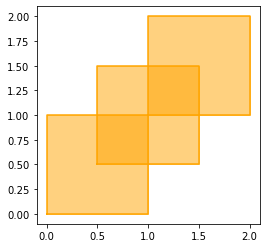

In [30]:
polygon1 = Polygon([(0,0), (1,0), (1,1), (0,1)])
polygon2 = Polygon([(1,1), (2,1), (2,2), (1,2)])
polygon3 = Polygon([(0.5,0.5), (1.5,0.5), (1.5,1.5), (0.5,1.5)])
polygons = MultiPolygon([polygon1, polygon2, polygon3])
fig = plt.figure(figsize=(4,4))
for p in polygons:
    x, y = p.exterior.xy
    plt.plot(x, y, color='orange')
    plt.fill(x, y, alpha=0.5, color='orange')
plt.show()

In [31]:
print(polygons.geoms)
print(polygons.area)
print(polygons.length)

3.0
12.0


### Predicates and Relationships
objects of the types explained in Geometric Objects provide standard predicates as attributes (for unary predicates) and methods (for binary predicates). whether unary or binary, all return __True__ or __False__ <br>
has_z, is_ccw, is_empty, is_ring, is_simple, is_valid

In [32]:
# has.z
# return True if the feature has not only x and y, but also z coordinats for 3D (or socalled, 2.5D) geometries
print(Point(0, 0).has_z)
print(Point(0, 0, 0).has_z)

False
True


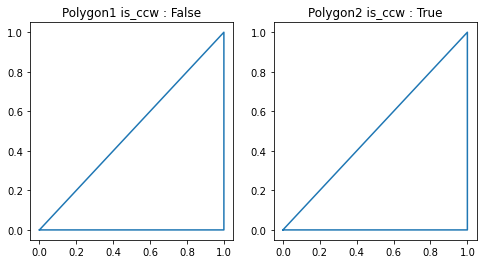

In [33]:
# is_ccw
# returns True if coordinates are in counter-clockwise order (bounding a region with positive signed area)
# this method applies to LinearRing objects only
# 시계반대방향으로 정렬된 경우 True 반환
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
polygon1 = Polygon([(0, 0), (1, 1), (1, 0)]) 
polygon2 = Polygon([(0, 0), (1, 0), (1, 1)]) 
x1 ,y1 = polygon1.exterior.xy
x2 ,y2 = polygon2.exterior.xy
ax[0].plot(x1, y1)
ax[1].plot(x2, y2)
ax[0].set_title('Polygon1 is_ccw : {}'.format(polygon1.exterior.is_ccw))
ax[1].set_title('Polygon2 is_ccw : {}'.format(polygon2.exterior.is_ccw))
# print(polygon1.exterior.is_ccw) # False
# print(polygon2.exterior.is_ccw) # True
plt.show()

In [34]:
# is_empty
# returns True if the feature's interior and (in point set terms) coincide with the empty set
print(Point().is_empty)
print(Polygon().is_empty)
print(Point(0,0).is_empty)
print(LinearRing([(0,0), (1,1), (1,0)]).is_empty)

True
True
False
False


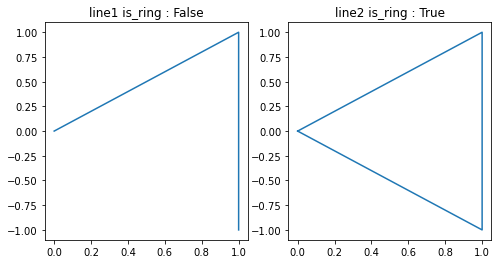

In [35]:
# is_ring
# returns True if the feature is a closed and simple LineString. A closed feature's boundary coincides with the empty set
line1 = LineString([(0,0), (1,1), (1,-1)])
line2 = LinearRing([(0,0), (1,1), (1,-1)])
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(*line1.xy)
ax[1].plot(*line2.xy)
ax[0].set_title('line1 is_ring : {}'.format(line1.is_ring))
ax[1].set_title('line2 is_ring : {}'.format(line2.is_ring))
plt.show()

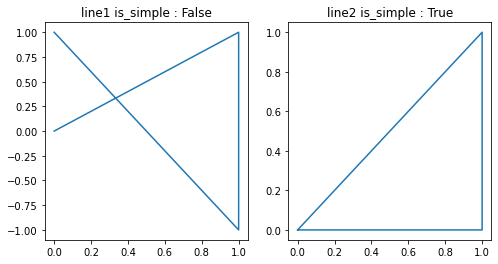

In [36]:
# is_simple
# returns True if the feature does not cross itself
line1 = LineString([(0,0), (1,1), (1,-1), (0,1)])
line2 = LineString([(0,0), (1,1), (1,0), (0,0)])
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(*line1.xy)
ax[1].plot(*line2.xy)
ax[0].set_title('line1 is_simple : {}'.format(line1.is_simple))
ax[1].set_title('line2 is_simple : {}'.format(line2.is_simple))
plt.show()

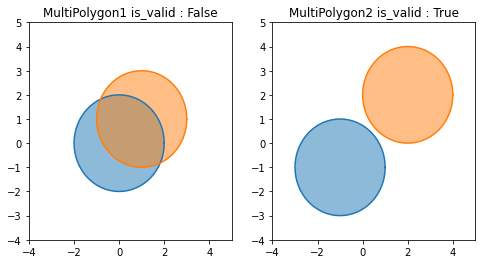

In [37]:
# is_valid
# returns True if a feature is 'valid' in the sense of
mp1 = MultiPolygon([Point(0,0).buffer(2), Point(1,1).buffer(2)])
mp2 = MultiPolygon([Point(-1,-1).buffer(2), Point(2,2).buffer(2)])
fig, ax = plt.subplots(1, 2, figsize=(8,4))
for p in mp1:
    x, y = p.exterior.xy
    ax[0].plot(x, y)
    ax[0].fill(x, y, alpha=0.5)
for p in mp2:
    x, y = p.exterior.xy
    ax[1].plot(x, y)
    ax[1].fill(x, y, alpha=0.5)
ax[0].set_xlim(-4, 5)
ax[0].set_ylim(-4, 5)
ax[1].set_xlim(-4, 5)
ax[1].set_ylim(-4, 5)
ax[0].set_title('MultiPolygon1 is_valid : {}'.format(mp1.is_valid))
ax[1].set_title('MultiPolygon2 is_valid : {}'.format(mp2.is_valid))
plt.show()

### Binary Predictate
equals, almost_equals, contains, crosses, disjoint, intersects, overlaps, touches, within

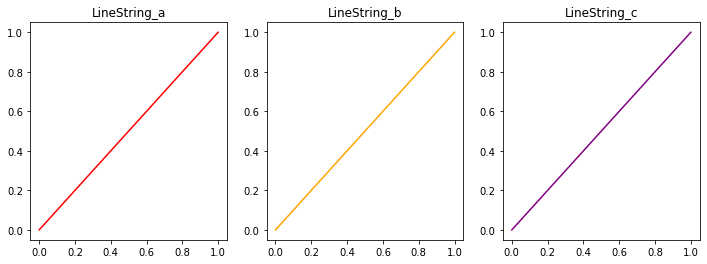

a == b : False
a.equals(b) : True
a == c : False
a.equals(c) : True


In [38]:
# equals(other)
# returns True if the set_theoretic boundary, interior, and exterior of the object coincide with those tf the other
a = LineString([(0,0), (1,1)])
b = LineString([(0,0), (0.5, 0.5), (1,1)])
c = LineString([(0,0), (0,0), (1,1)])
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].plot(*a.xy, color='red')
ax[1].plot(*b.xy, color='orange')
ax[2].plot(*c.xy, color='purple')
ax[0].set_title('LineString_a')
ax[1].set_title('LineString_b')
ax[2].set_title('LineString_c')
plt.show()
print('a == b : {}'.format(a == b))
print('a.equals(b) : {}'.format(a.equals(b)))
print('a == c : {}'.format(a == c))
print('a.equals(c) : {}'.format(a.equals(c)))

In [39]:
# almost_equals(other[, decimal=6])
# returns True if the approximately equal to the other at all points to specified decimal place precision

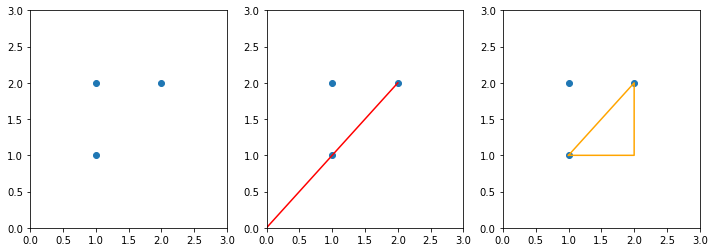

pt1.within(line1) : True
line1.contains(pt1) : True
line1.contains(pt2) : False
line1.contains(pt3) : False
polygon1.contains(pt1) : False
polygon1.contains(pt3) : False


In [40]:
# contain(other)
# returns True if no points of other lie in the exterior of the object and at least one point of the interior of other lies in the interior of object
pt1 = Point(1,1)
pt2 = Point(1,2)
pt3 = Point(2,2)
line1 = LineString([(0,0), (2,2)])
polygon1 = Polygon([(1,1), (2,1), (2,2)])
fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i in range(len(ax)):
    ax[i].set_xlim(0, 3)
    ax[i].set_ylim(0, 3)
    px = [pt.x for pt in [pt1, pt2, pt3]]
    py = [pt.y for pt in [pt1, pt2, pt3]]
    ax[i].scatter(px, py)
ax[1].plot(*line1.xy, color='red')
px1, py1 = polygon1.exterior.xy
ax[2].plot(px1, py1, color='orange')
plt.show()
print('pt1.within(line1) : {}'.format(pt1.within(line1)))
print('line1.contains(pt1) : {}'.format(line1.contains(pt1)))
print('line1.contains(pt2) : {}'.format(line1.contains(pt2)))
print('line1.contains(pt3) : {}'.format(line1.contains(pt3))) # 끝점일 경우 False로 인식
print('polygon1.contains(pt1) : {}'.format(polygon1.contains(pt1))) # 폴리곤은 False?
print('polygon1.contains(pt3) : {}'.format(polygon1.contains(pt3)))

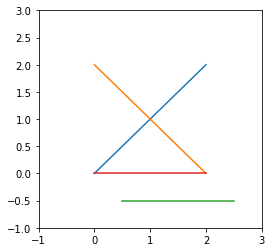

True
False
False


In [41]:
# crosses(other)
# returns True if the interior of the object intersect the interior of the other but does not contain it,
# and the dimension of the intersection is less than the dimension of the one or the other
coords = [(0,0), (2,2)]
line1 = LineString(coords)
line2 = LineString([(2,0), (0,2)])
line3 = LineString([(0.5, -0.5), (2.5, -0.5)])
line4 = LineString([(0, 0), (2, 0)])
fig = plt.figure(figsize=(4, 4))
plt.plot(*line1.xy, *line2.xy, *line3.xy, *line4.xy)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.show()
print(line1.crosses(line2))
print(line1.crosses(line3))
print(line1.crosses(line4)) # 꼭지점에 닿는건 False

In [42]:
# disjoint(other)
# returns True if the boundary and interior of the object do not intersect at all with those of th other
Point(0,0).disjoint(Point(1,1))

True

In [43]:
# intersects(other)
# returns True if the boundary or interior of the object intersect in any way with those of the other
print(Point(0,0).intersects(Point(1,1)))
print(Point(0,0).intersects(Point(0,0)))
print(Point(0,0).intersects(LineString([(0,0), (1,1)])))
# print(LineString([(0,0), (1,1)])).intersects(Point(0,0)) error LineString has not intersects

False
True
True


In [44]:
# touches(other)
# returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other
a = LineString([(0,0), (1,1)])
b = LineString([(1,1), (2,2)])
c = Point(0.5, 0.5)
print(a.touches(b))
print(b.touches(a))
print(a.touches(c)) # line에 내부의 점 인식 x

True
True
False


### Spatial Analysis Methods

In [45]:
# boundary
# returns a lower dimensional object representing the object's set theoretic boundary
# the boundary of a polygon is a line, the boundary of a line is a collection of points. 
# the boundary of a point is an empty (null) collection
coords = [((0,0), (1,1)), ((-1,0), (1,0))]
lines = MultiLineString(coords)
print(lines.boundary)
pprint(list(lines.boundary))
print(lines.boundary.boundary)
print(lines.boundary.boundary.is_empty)

MULTIPOINT (-1 0, 0 0, 1 0, 1 1)
GEOMETRYCOLLECTION EMPTY
True


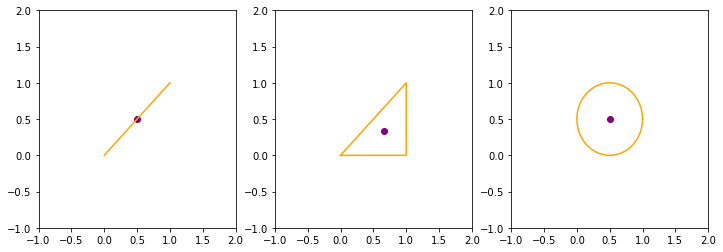

len(rx) : 65, len(ry): 65
POINT (0.5 0.5)
POINT (0.5000000000000002 0.5000000000000004)


In [46]:
# centroid
# returns a represenataion of the object's geometric centroid(point)
c = LineString([(0,0), (1,1)]).centroid
p = Polygon([(0,0), (1,1), (1,0)])
r = Point(0.5,0.5).buffer(0.5)
fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i in range(len(ax)):
    ax[i].set_xlim(-1, 2)
    ax[i].set_ylim(-1, 2)
ax[0].plot(*LineString([(0,0), (1,1)]).xy, color='orange')
ax[0].scatter(c.x, c.y, color='purple')
px, py = p.exterior.xy
ax[1].plot(px, py, color='orange')
ax[1].scatter(p.centroid.x, p.centroid.y, color='purple')
rx, ry = r.exterior.xy
ax[2].plot(rx, ry, color='orange')
ax[2].scatter(r.centroid.x, r.centroid.y, color='purple')
plt.show()
print('len(rx) : {}, len(ry): {}'.format(len(rx), len(ry)))
print(c.wkt)
print(r.centroid.wkt)

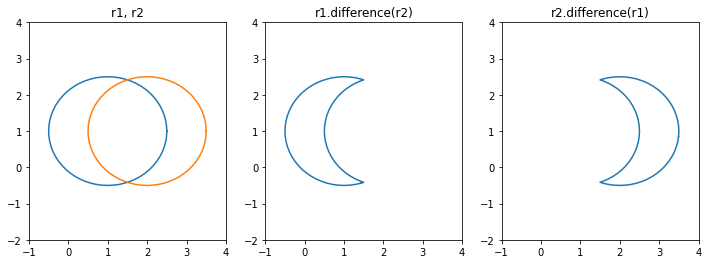

In [47]:
# difference(other)
# returns a representation of the object's geometric centroid(point)
r1 = Point(1,1).buffer(1.5)
r2 = Point(2,1).buffer(1.5)
fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i in range(len(ax)):
    ax[i].set_xlim(-1, 4)
    ax[i].set_ylim(-2, 4)
ax[0].plot(*(r1).exterior.xy, *(r2).exterior.xy)
ax[1].plot(*(r1.difference(r2)).exterior.xy)
ax[2].plot(*(r2.difference(r1)).exterior.xy)
ax[0].set_title('r1, r2')
ax[1].set_title('r1.difference(r2)')
ax[2].set_title('r2.difference(r1)')
plt.show()

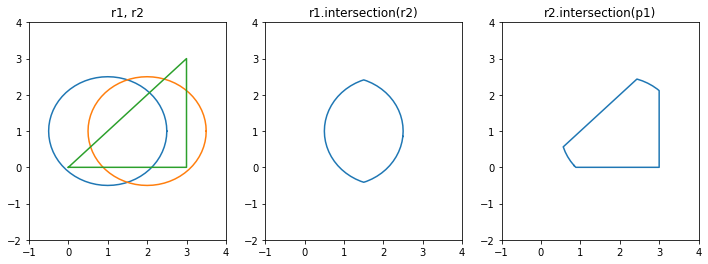

<class 'shapely.geometry.polygon.Polygon'>


In [48]:
# intersection(other)
# returns a representation of the intersection of this object with the other geometric object
r1 = Point(1,1).buffer(1.5)
r2 = Point(2,1).buffer(1.5)
p1 = Polygon([(0,0), (3,3), (3,0)])
fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i in range(len(ax)):
    ax[i].set_xlim(-1, 4)
    ax[i].set_ylim(-2, 4)
ax[0].plot(*r1.exterior.xy, *r2.exterior.xy, *p1.exterior.xy)
ax[1].plot(*(r1.intersection(r2)).exterior.xy)
ax[2].plot(*(r2.intersection(p1)).exterior.xy)
ax[0].set_title('r1, r2')
ax[1].set_title('r1.intersection(r2)')
ax[2].set_title('r2.intersection(p1)')
plt.show()
print(type(r2.intersection(p1)))

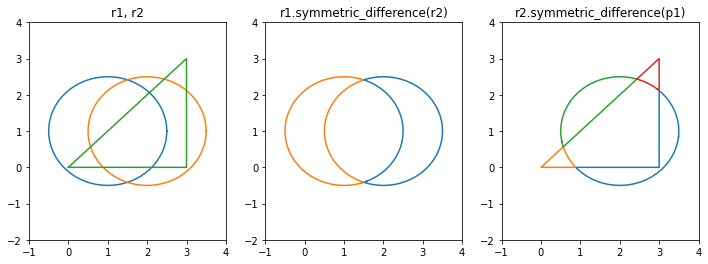

<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [49]:
# symmetric_difference(other)
# returns a representation of the points in this object not in the other geometric object,
# and the points in the other not in this geometric object
r1 = Point(1,1).buffer(1.5)
r2 = Point(2,1).buffer(1.5)
p1 = Polygon([(0,0), (3,3), (3,0)])
fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i in range(len(ax)):
    ax[i].set_xlim(-1, 4)
    ax[i].set_ylim(-2, 4)
ax[0].plot(*r1.exterior.xy, *r2.exterior.xy, *p1.exterior.xy)
for mp in r1.symmetric_difference(r2):
    ax[1].plot(*mp.exterior.xy)
for mp in r2.symmetric_difference(p1):
    ax[2].plot(*mp.exterior.xy)
ax[0].set_title('r1, r2')
ax[1].set_title('r1.symmetric_difference(r2)')
ax[2].set_title('r2.symmetric_difference(p1)')
plt.show()
print(type(r2.symmetric_difference(p1)))
# 'MultiPolygon' object has no attribute 'exterior'

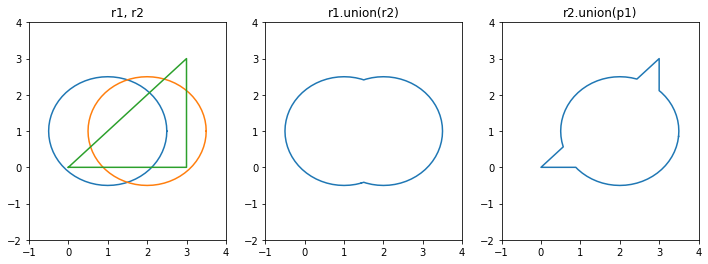

<class 'shapely.geometry.polygon.Polygon'>


In [50]:
# union(other)
# returns a representation of the union of points from this object and the other geometric object
r1 = Point(1,1).buffer(1.5)
r2 = Point(2,1).buffer(1.5)
p1 = Polygon([(0,0), (3,3), (3,0)])
fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i in range(len(ax)):
    ax[i].set_xlim(-1, 4)
    ax[i].set_ylim(-2, 4)
ax[0].plot(*r1.exterior.xy, *r2.exterior.xy, *p1.exterior.xy)
ax[1].plot(*(r1.union(r2)).exterior.xy)
ax[2].plot(*(r2.union(p1)).exterior.xy)
ax[0].set_title('r1, r2')
ax[1].set_title('r1.union(r2)')
ax[2].set_title('r2.union(p1)')
plt.show()
print(type(r2.union(p1)))
# union 시 하나로 합쳐짐

POLYGON ((0.5 0, 0.5 1, 1 1, 1 0, 0.5 0))
POLYGON ((0 0, 0 1, 0.5 1, 1 1, 1.5 1, 1.5 0, 1 0, 0.5 0, 0 0))
POLYGON ((0 0, 0 1, 0.5 1, 0.5 0, 0 0))
MULTIPOLYGON (((0 0, 0 1, 0.5 1, 0.5 0, 0 0)), ((1 1, 1.5 1, 1.5 0, 1 0, 1 1)))


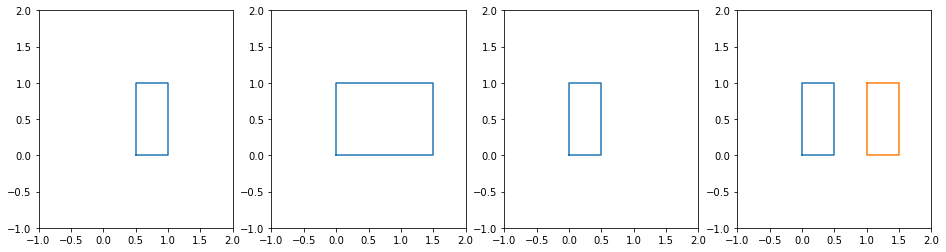

In [51]:
from shapely import wkt
p1 = wkt.loads('POLYGON((0 0, 1 0, 1 1, 0 1, 0 0))')
p2 = wkt.loads('Polygon((0.5 0, 1.5 0, 1.5 1, 0.5 1, 0.5 0))')
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i in range(len(ax)):
    ax[i].set_xlim(-1, 2)
    ax[i].set_ylim(-1, 2)
polygons = [(p1 & p2), (p1 | p2), (p1 - p2), (p1 ^ p2)]
for i, p in enumerate(polygons):
    if type(p)== Polygon :
        ax[i].plot(*p.exterior.xy)
    else:
        for ip in p:
            ax[i].plot(*ip.exterior.xy)
    print(p)
plt.show()

### Constructive Method
Shapely geometric object have several methods that yield new objects not derived from set-theoretice analysis

buffer(distance, resolution=16, cap_style=1, join_style=1, mitre_limit=5)
returns and approximate representation of all points within a given distance of the this geometric object

CAP_STYLE = {attribute : value} = {round : 1, flat : 2, square : 3}<br>
JOIN_STYLE = {attribute : value} = {round : 1, flat : 2, square : 3}

In [52]:
print(CAP_STYLE.flat)
print(JOIN_STYLE.bevel)

2
3


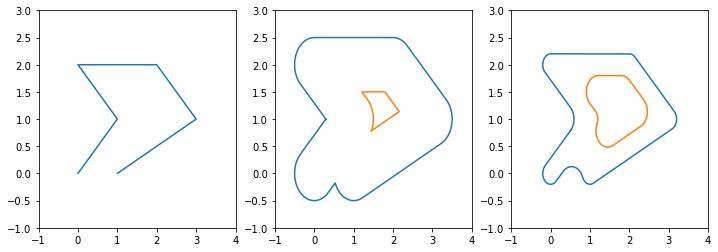

In [53]:
line = LineString([(0,0), (1,1), (0,2), (2,2), (3,1), (1,0)])
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i in range(len(ax)):
    ax[i].set_xlim(-1, 4)
    ax[i].set_ylim(-1, 3)
ax[0].plot(*line.xy)
dilated = line.buffer(0.5).boundary
eroded = line.buffer(0.5).buffer(-0.3).boundary
for d in dilated:
    ax[1].plot(*d.xy)
for e in eroded:
    ax[2].plot(*e.xy)
plt.show()

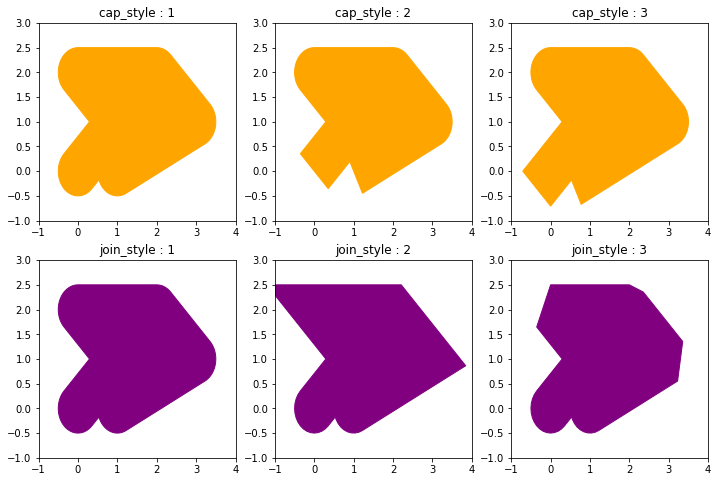

In [54]:
style = ['cap_style : 1', 'cap_style : 2', 'cap_style : 3', 'join_style : 1', 'join_style : 2', 'join_style : 3']
fig, ax = plt.subplots(2, 3, figsize=(12,8))
for i in range(2):
    for j in range(3):
        ax[i][j].set_xlim(-1, 4)
        ax[i][j].set_ylim(-1, 3)
        ax[i][j].set_title(f'{style[(i*3)+j]}')
ax[0][0].fill(*line.buffer(0.5, cap_style=1).boundary[0].xy, color='orange')
ax[0][1].fill(*line.buffer(0.5, cap_style=2).boundary[0].xy, color='orange')
ax[0][2].fill(*line.buffer(0.5, cap_style=3).boundary[0].xy, color='orange')
ax[1][0].fill(*line.buffer(0.5, join_style=1).boundary[0].xy, color='purple')
ax[1][1].fill(*line.buffer(0.5, join_style=2).boundary[0].xy, color='purple')
ax[1][2].fill(*line.buffer(0.5, join_style=3).boundary[0].xy, color='purple')
plt.show()

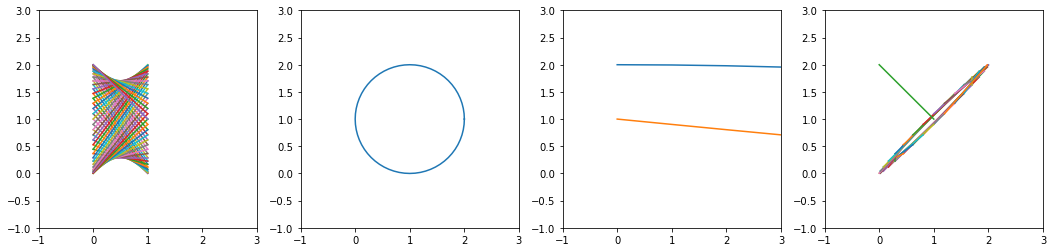

In [55]:
c = Point(1,1).buffer(1)
fig, ax = plt.subplots(1, 4, figsize=(18,4))
for i in range(len(ax)):
    ax[i].set_xlim(-1, 3)
    ax[i].set_ylim(-1, 3)
ax[0].plot(c.exterior.xy)
ax[1].plot(*c.exterior.xy)
ax[2].plot(c.exterior.coords)
ax[3].plot(*c.exterior.coords)
plt.show()

In [64]:
# convex_hull
# returns a representation of the smallest convex polygon containig all the points in the object unless the number of points in the object is less than three
# for two points, the convex hull collapses to a LineString

print(Point(0,0).convex_hull)
print(MultiPoint([(0,0), (5,5)]).convex_hull)
print(MultiPoint([(0,0), (0,5), (5,5), (5,0), (0,0)]).convex_hull)

POINT (0 0)
LINESTRING (0 0, 5 5)
POLYGON ((0 0, 0 5, 5 5, 5 0, 0 0))


In [ ]:
# minimum_rotated_rectangle
# returns the general minimul bounding rectangle that contains the object
# unlike envelope this rectangle is not constrained to be parallel to the coordinate axes

In [82]:
# 다각형의 점 만들기(랜덤범위1, 랜덤범위2, 점 개수)

def making_pts(r1, r2, n):
    pts = []
    while len(pts) < n:
        x, y = rd.randint(r1, r2), rd.randint(r1, r2)
        if (x, y) not in pts:
            pts.append((x, y))
    return pts

# 각도 계산(두 점)

def calculating_Angle(pt1, pt2):
    dx, dy = (pt2[0] - pt1[0]), (pt2[1] - pt1[1])
    if dx >= 0 and dy == 0:
        angle = 0
    else:
        angle = math.atan2(dy, dx) * 180 / math.pi
    return angle

# 단순 다각형 만들기(포인트 리스트)

def making_Polygon(pts):
    angle_list = []
    result = [0 for _ in range(len(pts))]
    pts = sorted(pts, key=lambda x: (x[1], x[0]))
    standard_pt = pts[0]
    for pt in pts[1:]:
        angle_of_pt = calculating_Angle(standard_pt, pt)
        angle_list.append([angle_of_pt, pt])
    angle_list = sorted(angle_list, key = lambda x: (x[0], x[1][0], -x[1][1]))
    result[0] = standard_pt
    for idx, i in enumerate(angle_list):
        result[idx+1] = i[1]
    return result

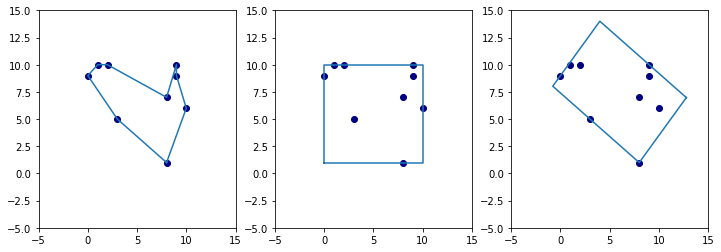

In [91]:
pts_1 = making_pts(0, 10, 9)
pts_2 = making_Polygon(pts_1)
polygon = Polygon(pts_2)
rec_envelope = polygon.envelope
rec_mrr = polygon.minimum_rotated_rectangle

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for pt in pts_2:
    for i in range(3):
        p = Point(pt)
        ax[i].scatter(p.x, p.y, color='navy')
        ax[i].set_xlim(-5, 15)
        ax[i].set_ylim(-5, 15)
ax[0].plot(*polygon.exterior.xy)
ax[1].plot(*rec_envelope.boundary.xy)
ax[2].plot(*rec_mrr.boundary.xy)
plt.show()

#### Source code about Minimum_rotated_rectangle

link : https://github.com/Toblerity/Shapely/blob/master/shapely/geometry/base.py

    def minimum_rotated_rectangle(self):
        """Returns the general minimum bounding rectangle of
        the geometry. Can possibly be rotated. If the convex hull
        of the object is a degenerate (line or point) this same degenerate
        is returned.
        """
        # first compute the convex hull
        hull = self.convex_hull
        try:
            coords = hull.exterior.coords
        except AttributeError:  # may be a Point or a LineString
            return hull
        # generate the edge vectors between the convex hull's coords
        edges = ((pt2[0] - pt1[0], pt2[1] - pt1[1]) for pt1, pt2 in zip(
            coords, islice(coords, 1, None)))

        def _transformed_rects():
            for dx, dy in edges:
                # compute the normalized direction vector of the edge
                # vector.
                length = math.sqrt(dx ** 2 + dy ** 2)
                ux, uy = dx / length, dy / length
                # compute the normalized perpendicular vector
                vx, vy = -uy, ux
                # transform hull from the original coordinate system to
                # the coordinate system defined by the edge and compute
                # the axes-parallel bounding rectangle.
                transf_rect = affine_transform(
                    hull, (ux, uy, vx, vy, 0, 0)).envelope
                # yield the transformed rectangle and a matrix to
                # transform it back to the original coordinate system.
                yield (transf_rect, (ux, vx, uy, vy, 0, 0))

        # check for the minimum area rectangle and return it
        transf_rect, inv_matrix = min(
            _transformed_rects(), key=lambda r: r[0].area)
        return affine_transform(transf_rect, inv_matrix)

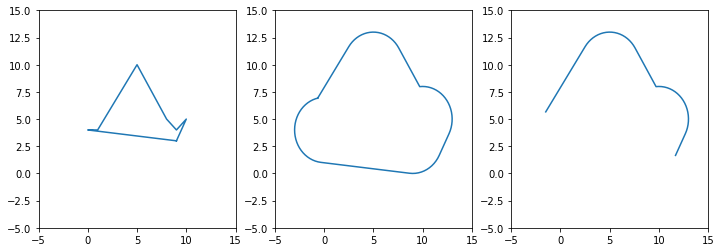

<class 'shapely.geometry.linestring.LineString'>


In [130]:
# parallel_offset(distance, side, resolution=16, join_style=1, mitre_limit=5.0)
# returns a LineString or MultiLineString geometry at a distance from the object on its right or its left side

polygon_pts = making_pts(0, 10, 7)
polygon_pts2 = making_Polygon(polygon_pts)
polygon_1 = Polygon(polygon_pts2)
line_1 = LineString(polygon_pts2)
polygon_2 = polygon_1.buffer(3)
polygon_3 = line_1.parallel_offset(3)
# Polygon, LinearRing has no attribute 'parallel_offset'

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(*polygon_1.boundary.xy)
ax[1].plot(*polygon_2.boundary.xy)
ax[2].plot(*polygon_3.xy)
for i in range(3):
    ax[i].set_xlim(-5, 15)
    ax[i].set_ylim(-5, 15)
    ax[i].set_title('')
plt.show()
print(type(polygon_3))

In [176]:
# simplyify(tolerance, preserve_topology = True)
# returns a simplified representation of the geomatric object
# about tolerance : 공차

Area : 200.7391033949401, len : 65, tolerance : None
Area : 195.93391737092597, len : 17, tolerance : 0.5
Area : 128.0, len : 5, tolerance : 4


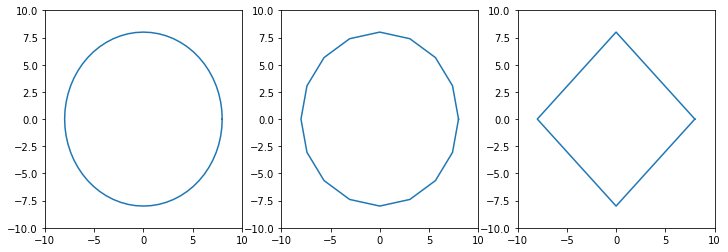

In [177]:
p = Point(0, 0)
x_0 = p.buffer(8)
print(f'Area : {x_0.area}, len : {len(x_0.exterior.coords)}, tolerance : None')
x_1 = x_0.simplify(0.5, preserve_topology=False)
print(f'Area : {x_1.area}, len : {len(x_1.exterior.coords)}, tolerance : 0.5')
x_2 = x_0.simplify(4, preserve_topology=False)
print(f'Area : {x_2.area}, len : {len(x_2.exterior.coords)}, tolerance : 4')

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(*x_0.exterior.xy)
ax[1].plot(*x_1.exterior.xy)
ax[2].plot(*x_2.exterior.xy)
for i in range(3):
    ax[i].set_xlim(-10, 10)
    ax[i].set_ylim(-10, 10)
plt.show()

### Affine Transfromations
A collection of affine transform functions are in the shapely.affinity module, which return transformed geometries by either directly supplying coefficients to an affine transformation matrix, or by using a specific, named transform (rotate, scale, etc.). The functions can be used with all geometry types (except GeometryCollection), and 3D types are either preserved or supported by 3D affine transformations.

In [179]:
# affine_transfomr(geom, matrix)
# returns a transformed geometry using an affine transformation matrix

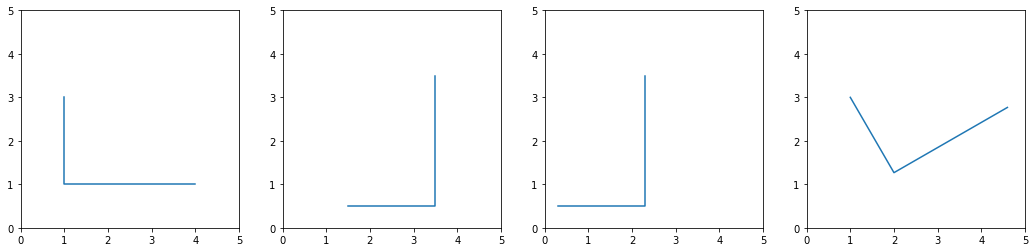

In [214]:
# rotate(geom, angle, origin='center', use_radinas=False)
# returns a rotated geometry on a 2D plane

from shapely import affinity
line = LineString([(1,3), (1,1), (4,1)])
line_coords = line.coords
rotated_a = affinity.rotate(line, 90, origin='center') # default origin : center
rotated_b = affinity.rotate(line, 90, origin='centroid')
rotated_c = affinity.rotate(line, 30, origin=line_coords[0])

fig, ax = plt.subplots(1, 4, figsize=(18,4))
ax[0].plot(*line.xy)
ax[1].plot(*rotated_a.xy)
ax[2].plot(*rotated_b.xy)
ax[3].plot(*rotated_c.xy)

for i in range(4):
    ax[i].set_xlim(0, 5)
    ax[i].set_ylim(0, 5)
plt.show()

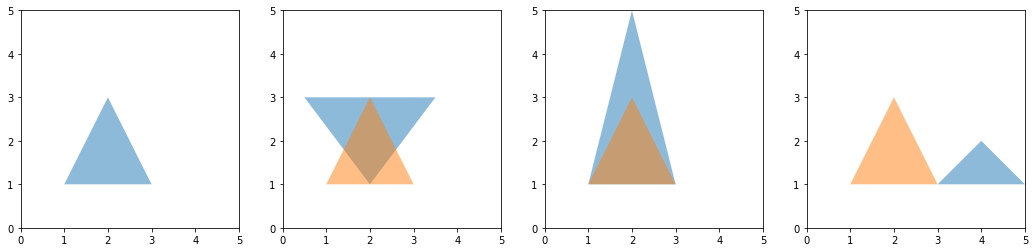

In [216]:
# scale(geom, xfact = 1.0, yfact = 1.0, zfact = 1.0, origin='center')
# returns a scaled geometry, scaled by factors along each dimension

tri = Polygon([(1,1), (2,3), (3,1)])
tri_coords = tri.exterior.coords
tri_a = affinity.scale(tri, xfact=1.5, yfact=-1) # default origin = center
tri_b = affinity.scale(tri, xfact=1, yfact=2, origin=tri_coords[0])
tri_c = affinity.scale(tri, xfact=-1, yfact=0.5, origin=tri_coords[2])

fig, ax = plt.subplots(1, 4, figsize=(18, 4))
ax[1].fill(*tri_a.boundary.xy, alpha=0.5)
ax[2].fill(*tri_b.boundary.xy, alpha=0.5)
ax[3].fill(*tri_c.boundary.xy, alpha=0.5)

for i in range(4):
    ax[i].set_xlim(0, 5)
    ax[i].set_ylim(0, 5)
    ax[i].fill(*tri.boundary.xy, alpha=0.5)
plt.show()

..ing